In [11]:
import tensorflow as tf
import pandas as pd
import keras
from keras.datasets import imdb

In [12]:
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words = 10000) 


In [13]:
print(xtrain[0])
print(ytrain[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [14]:
indexes = imdb.get_word_index()
print(indexes['good'])

49


In [15]:
reversed = dict((value,key) for key, value in indexes.items())

In [16]:
def decode(review):
  text =''
  for i in review:
    text+= reversed[i]
    text+=' '
  return text
  

In [17]:
#example of decoding reviews
decode(xtrain[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [18]:
#padding the examples, ie, adding meaningless words like 'this', 'a', 'are' etc. 
#Using specific words like 'terrible', 'wonderful' to guage the reaction
from keras.preprocessing.sequence import pad_sequences as p_s
xtrain = p_s(xtrain, value=indexes['the'],padding = 'post', maxlen = 256)
xtest= p_s(xtest, value=indexes['the'],padding = 'post', maxlen = 256)



In [19]:
#making the model using work embeddings
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [20]:
model = Sequential([
                    Embedding(10000,16),
                    GlobalAveragePooling1D(),
                    Dense(16, activation = 'relu'),
                    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import LambdaCallback as lmc
simplelog = lmc(on_epoch_end=lambda e, l:print(e, end=','))

fitting = model.fit(
    xtrain,ytrain,
    validation_split=0.2,
    epochs = 20,
    callbacks = [simplelog],
    verbose=False
)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

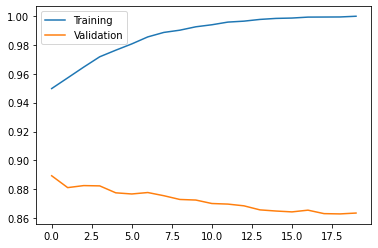

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range (20), fitting.history['accuracy'], label='Training')
plt.plot(range (20),fitting.history['val_accuracy'],label = 'Validation')
plt.legend()
plt.show()

In [26]:
#overfitting in validation 
loss, acc = model.evaluate(xtest, ytest)
print('Test set accuracy: ',acc*100)

782/782 [==============================] - 2s 3ms/step - loss: 1.1364 - accuracy: 0.8399
Test set accuracy:  83.99199843406677


In [27]:
import numpy as np
p = model.predict(np.expand_dims(xtest[0],axis=0))
names = ['Negative','Positive']
print(names[np.argmax(p[0])])

Negative


In [28]:
decode(xtest[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the